The **NPV(Net Present Value)** of a project is calculated as the present value of the project's future after-tax cash flows minus the original investment.

An **NPV profile** is a graph showing the project's NPV as a function of various discount rates or required rates of return.

Let's design an NPV profile using an example.

> G Corp. is evaluating a project which requires an initial investment outlay of \$50 million.
> The project is expected to return after-tax cash flows of \$16 million per year for the next 3 years,
> nothing in Year 4, and a final \$20 million in Year 5.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

The cash flows of the project are as follows:
<table>
    <theader>
        <th>Year</th>
        <th>Type of cash flow</th>
        <th>Amount (in millions)</th>
    </theader>
    <tr>
        <td>0</td>
        <td>Outflow</td>
        <td>50</td>
    </tr>
        <tr>
        <td>1</td>
        <td>Inflow</td>
        <td>16</td>
    </tr>
        <tr>
        <td>2</td>
        <td>Inflow</td>
        <td>16</td>
    </tr>
        <tr>
        <td>3</td>
        <td>Inflow</td>
        <td>16</td>
    </tr>
        <tr>
        <td>4</td>
        <td>N/A</td>
        <td>0</td>
    </tr>
        <tr>
        <td>5</td>
        <td>Inflow</td>
        <td>20</td>
    </tr>
</table>

Let's define a array for these cash flows. I will follow the convention of representing outflows by negative numbers and inflows by positive numbers.

In [2]:
cash_flows = np.array([-50] + [16] * 3 + [0, 20])
cash_flows

array([-50,  16,  16,  16,   0,  20])

Define a range of interest rates over which we want to calculate the project's NPV

In [3]:
rates = np.arange(5, 15, .5)
rates

array([  5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,   9. ,
         9.5,  10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,  13.5,
        14. ,  14.5])

Calculate the NPV Profile of the project using *NumPy* as follows:

In [4]:
npv_profile = np.array([np.npv(rate=rate/100, values=cash_flows) for rate in rates])
npv_profile[:3]

array([ 9.2424918 ,  8.46962113,  7.71335465])

In [5]:
ser = pd.Series(npv_profile, index=rates)
ser.name, ser.index.name = 'NPV', 'rates'
ser

rates
5.0     9.242492
5.5     8.469621
6.0     7.713355
6.5     6.973225
7.0     6.248780
7.5     5.539584
8.0     4.845216
8.5     4.165266
9.0     3.499342
9.5     2.847063
10.0    2.208058
10.5    1.581973
11.0    0.968462
11.5    0.367191
12.0   -0.222163
12.5   -0.799912
13.0   -1.366360
13.5   -1.921799
14.0   -2.466514
14.5   -3.000780
Name: NPV, dtype: float64

We can see that the NPV declines with a increase in the discount rate. Let's now plot this series.

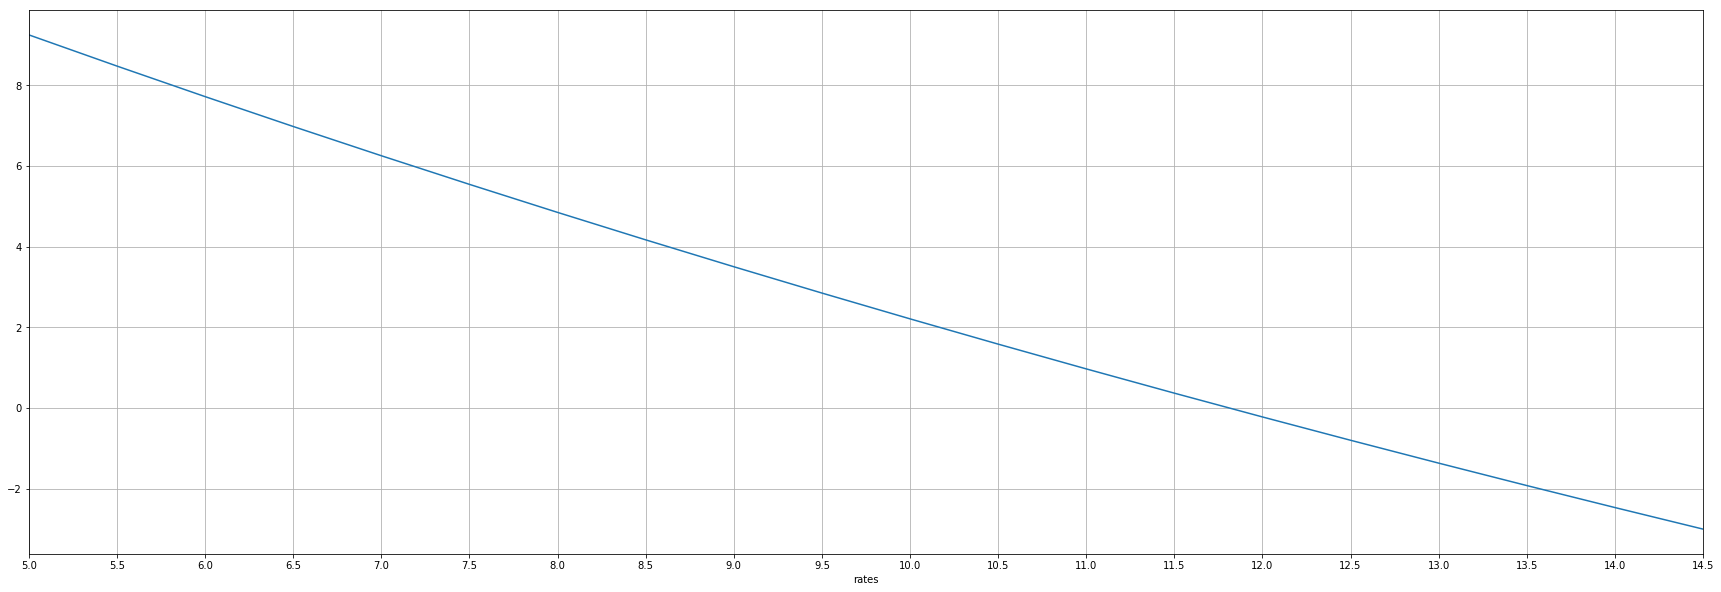

In [6]:
ser.plot(figsize=(30,10), grid=True, xticks=rates)

As the above graph shows, the NPV declines with an increase in the desired rate of return. Between the rates of 11.5% and 12%, the NPV becomes 0 and enters negative territory thereafter. The precise rate at which the NPV becomes 0 can be calculated using NumPy's *IRR* method.

In [7]:
np.round(np.irr(cash_flows) * 100, 2)

11.81